## Analysing a dataset from Facebook

http://networkrepository.com/socfb-Stanford3.php

An undirected graph

In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Fb = nx.Graph()

In [6]:
with open('socfb-Stanford3.mtx') as f:
    f.readline()
    f.readline()
    for line in f:
        a, b = line.strip().split()
        Fb.add_edge(int(a),int(b))

In [7]:
print('Number of nodes: {}'.format(Fb.order()))
print('Number of links: {}'.format(Fb.size()))

Number of nodes: 11586
Number of links: 568309


In [8]:
density = nx.density(Fb)
print('Density: {}'.format(density))

Density: 0.00846808029067272


## Degree analysis

In [9]:
degree = list(dict(Fb.degree()).values())

In [10]:
print('Mean degree: {}'.format(np.mean(degree)))
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

Mean degree: 98.10271016744346
Standard deviation: 98.33765103364449
Median: 73.0
Min: 1
Max: 1172


### ECDF in linear e logscale

Text(0,0.5,'ECDF Facebook')

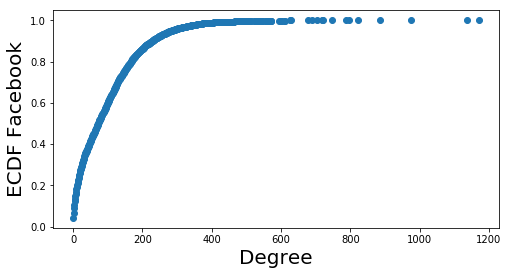

In [11]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Facebook', size = 20)

Text(0,0.5,'ECDF Facebook')

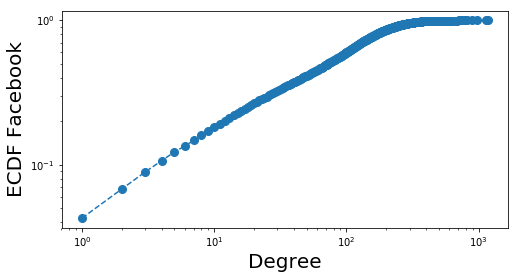

In [12]:
# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Facebook', size = 20)

Text(0,0.5,'ECCDF Facebook')

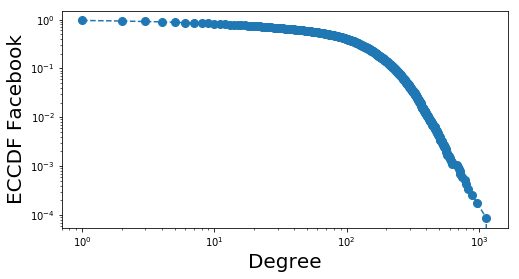

In [13]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF Facebook', size = 20)

In [14]:
p = density

In [15]:
random_graph = nx.fast_gnp_random_graph(Fb.order(),p)

In [16]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 11586
Number of links: 568656


In [17]:
random_degree = list(dict(random_graph.degree()).values())

Text(0,0.5,'ECCDF')

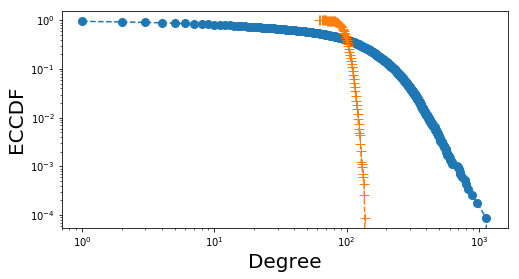

In [18]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)


# Hubs


In [19]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

413.14999999999964


In [20]:
hub_nodi = [k for k,v in dict(Fb.degree()).items() if v>= percentile_99]

In [21]:
print(len(hub_nodi))
print(list(hub_nodi))

116
[193, 2086, 8897, 10069, 1076, 2380, 6160, 6833, 8571, 8776, 8891, 8942, 9887, 9922, 2378, 3499, 4744, 7465, 9991, 10620, 10769, 952, 1121, 1514, 2643, 3539, 3836, 5412, 6563, 8303, 8381, 11365, 329, 129, 4428, 4894, 5962, 6761, 8784, 705, 1847, 3110, 4205, 10067, 1235, 2809, 2827, 5737, 8111, 8128, 9131, 9620, 10058, 9210, 10546, 261, 30, 45, 3979, 4317, 5061, 5876, 6065, 6110, 6208, 8339, 9613, 5984, 10034, 3593, 1105, 1218, 1288, 2481, 3050, 3161, 3408, 3428, 3465, 4038, 5004, 5581, 6244, 6647, 7592, 8321, 10249, 10296, 10345, 10830, 11440, 1837, 4734, 1160, 1355, 4942, 5402, 7970, 8905, 9876, 10305, 6689, 1545, 8662, 5314, 8248, 4191, 9665, 1416, 168, 2537, 773, 7518, 11222, 698, 3463]


# Isolates

In [22]:
print(list(nx.isolates(Fb)))

[]


# Connectivity
#### is_connected(G)
Returns True if the graph is connected, False otherwise.
#### nx.number_connected_components(G)
Returns the number of connected components.

In [23]:
print(nx.is_connected(Fb))
print(nx.number_connected_components(Fb))

True
1
